# Report on PCA and Fast Map Algorithms

by Ruijie Rao

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Import

In [4]:
with open("pca-data.txt", "r") as file:
    content = file.readlines()
pca_data = np.array([line.strip("\n").split("\t") for line in content] ).astype(float)

In [5]:
pca_data

array([[  5.90626285,  -7.72946458,   9.14494487],
       [ -8.64032311,   1.72426044, -10.69680519],
       [  0.25854061,   0.23062224,   0.76743916],
       ...,
       [ -3.69142791,  -0.474338  ,   0.55020057],
       [  7.63831529,  -4.47583291,   8.15392291],
       [  9.72207756,  -8.50135442,   8.8424068 ]])

In [6]:
with open("fastmap-data.txt", "r") as file:
    content = file.readlines()
fm_data = np.array([line.strip("\n").split("\t") for line in content] ).astype(float)
with open("fastmap-wordlist.txt", "r") as file:
    content = file.readlines()
fm_wordlist = np.array([line.strip("\n") for line in content] )

In [7]:
fm_wordlist

array(['acting', 'activist', 'compute', 'coward', 'forward',
       'interaction', 'activity', 'odor', 'order', 'international'],
      dtype='<U13')

# PCA Algorithm

## Brief Description

The goal of PCA is to lower the dimension of high-dimensional data by capturing the attributes with most variability, which will help us in visualization and acceleration in other model trainings.
1. Calculate covariance matrix of the data points.
2. Compute the eigenvalues and their eigenvectors.
3. Pick the largest N eigenvalues and their eigenvectors.
4. Generate a new data set using the original data and the new eigenvectors.

## Algorithm Construct

In [21]:
n = 2 # Reduce to 2D
pca_data_meaned = pca_data-np.mean(pca_data,axis=0)
cov_mat = np.cov(pca_data_meaned,rowvar=False) # Covariance Matrix 3x3
e_val, e_vec = np.linalg.eigh(cov_mat) # eval are 3 scalars, evec is 3x3 mat
e_vec_reduced = e_vec[np.argsort(e_val)][::-1][:,:n] # Reduced to 3x2
pca_data_reduced = pca_data_meaned@e_vec_reduced

## Test

In [22]:
pca_data_reduced

array([[-3.73636464, -3.47164008],
       [-2.68767077,  1.73739336],
       [ 0.30249399,  0.3288875 ],
       ...,
       [-2.41984582,  2.69798271],
       [-0.01802045, -3.59947044],
       [-2.29884773, -6.73009149]])

## Result

Directions of the first two principal components:

In [36]:
e_vec_reduced.T

array([[ 0.54233352,  0.83862076, -0.0508879 ],
       [-0.71496368,  0.4924792 ,  0.4962773 ]])

Following is a graph in 3D of the original coordinates.

<function matplotlib.pyplot.show(close=None, block=None)>

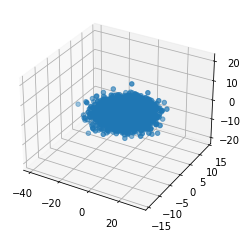

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2])
plt.show

Following is a graph in 2D of the reduced coordinates.

<function matplotlib.pyplot.show(close=None, block=None)>

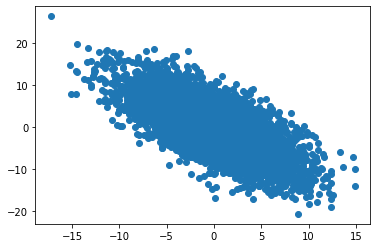

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(pca_data_reduced[:,0], pca_data_reduced[:,1])
plt.show

## Implementation of Library Function

Going to use SKLearn PCA on the training data to see the difference.

In [1]:
from sklearn.decomposition import PCA

[[-10.87667009   7.37396173]
 [ 12.68609992  -4.24879151]
 [ -0.43255106   0.26700852]
 ...
 [  2.92254009   2.41914881]
 [-11.18317124   4.20349275]
 [-14.2299014    5.64409544]]


<function matplotlib.pyplot.show(close=None, block=None)>

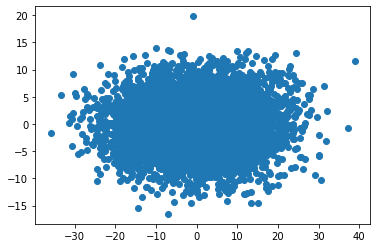

In [11]:
pca = PCA(n_components=2)
sk_pca_data_reduced = pca.fit_transform(pca_data)
print(sk_pca_data_reduced)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(sk_pca_data_reduced[:,0], sk_pca_data_reduced[:,1])
plt.show

# Fast Map Algorithm

## Brief Description

The goal of Fast Map is to map objects into euclidean space.
1. According to distance between each pair of objects, iterate and find the furthest pair (as $O_a$ and $O_b$).
2. $O_a$ and $O_b$ forms a line that defines the first dimension of the resulted points. Calculate the first dimension of every point by projecting $O_i$ onto $O_aO_b$.
3. Find a new dimension that is perpendicular to the former dimension. Find the distance between each pair of points using the function:$D_{new}(O_i',O_j')^2=D(O_i,O_j)^2-(x_i,x_j)^2$
4. Iterate.

## Algorithm Construct

### Data Preparation

Going to build a distance matrix every iteration and inherit the matrix to the next iteration for new distance calculation. Distance matrix is going to be a dictionary, with *index* and *value* 2 lists as following. *Index* will be a list of sets that contains a and b of the pair. *Value* will be a list of distance values between $p_a$ and $p_b$. 

In [75]:
dist_mat = {"index":[],"value":[]}
print("index: value:")
for row in fm_data:
    a = int(row[0])-1
    b = int(row[1])-1
    d = row[2]
    dist_mat["index"].append({a,b})
    dist_mat["value"].append(d)
    print(f" {a},{b}    {d}")

index: value:
 0,1    4.0
 0,2    7.0
 0,3    6.0
 0,4    7.0
 0,5    7.0
 0,6    4.0
 0,7    6.0
 0,8    6.0
 0,9    10.0
 1,2    7.0
 1,3    7.0
 1,4    8.0
 1,5    9.0
 1,6    2.0
 1,7    8.0
 1,8    8.0
 1,9    11.0
 2,3    5.0
 2,4    6.0
 2,5    10.0
 2,6    6.0
 2,7    6.0
 2,8    6.0
 2,9    12.0
 3,4    2.0
 3,5    10.0
 3,6    7.0
 3,7    4.0
 3,8    5.0
 3,9    12.0
 4,5    10.0
 4,6    8.0
 4,7    5.0
 4,8    4.0
 4,9    11.0
 5,6    9.0
 5,7    10.0
 5,8    9.0
 5,9    4.0
 6,7    8.0
 6,8    8.0
 6,9    11.0
 7,8    2.0
 7,9    12.0
 8,9    11.0


Finding the distance between $p_a$ and $p_b$ will simply be slicing in the value list using index pair.

In [45]:
def find_distance(a,b,dist_mat):
    return dist_mat["value"][dist_mat["index"].index({a,b})]

### Config

In [65]:
N = len(fm_wordlist) # Number of objects
k = 2 # 2D dimension

### Generate New Distance Matrix

$D_{new}(O_i',O_j')^2=D(O_i,O_j)^2-(x_i,x_j)^2$

In [68]:
def gen_distance_matrix(dist_mat,x):
    for i in range(len(dist_mat["index"])):
        a,b = dist_mat["index"][i]
        dist_mat["value"][i] = np.sqrt(np.square(dist_mat["value"][i])-np.square(x[a]-x[b]))
    return dist_mat

### Find Furthest Pair

Going to find the furthest pair of points by finding the max distance among all distances of all pairs.

In [61]:
def find_furthest_pair(dist_mat):
    a,b = dist_mat["index"][np.argmax(dist_mat["value"])]
    return a,b

### Generate New Dimension Coordinates

Except for $i=a,b$, $xi = \frac{(d_{ai}^2+d_{ab}^2−d_{ib}^2)}{(2d_{ab})}$

In [57]:
def gen_x(a,b,dist_mat):
    x = np.zeros(N)
    dab = find_distance(a,b,dist_mat)
    x[a] = 0 # P_a to itself
    x[b] = dab # Furthest distance
    for i in range(N):
        if i==a or i==b:
            continue
        dai = find_distance(a,i,dist_mat)
        dib = find_distance(i,b,dist_mat)
        x[i] = (dai**2+dab**2-dib**2)/(2*dab)
    return x

### Loop Construct

In [66]:
def Fast_Map(dist_mat,k=2): # k dimension
    result = np.zeros((N,k))
    for c in range(k):
        if c != 0:
            dist_mat = gen_distance_matrix(dist_mat,x)
        a,b = find_furthest_pair(dist_mat)
        x = gen_x(a,b,dist_mat)
        result[:,c] = x
    return result

### Test

In [74]:
Fast_Map(dist_mat,k=2)

array([[ 8.125     ,  6.0625    ],
       [ 9.        ,  7.75      ],
       [12.        ,  4.        ],
       [10.95833333,  1.1875    ],
       [ 9.54166667,  0.        ],
       [ 2.5       ,  5.1875    ],
       [ 9.54166667,  8.        ],
       [10.5       ,  1.5625    ],
       [ 9.54166667,  1.        ],
       [ 0.        ,  4.        ]])

### Plot Result

<function matplotlib.pyplot.show(close=None, block=None)>

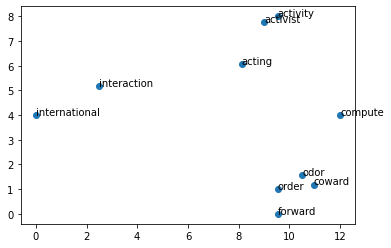

In [76]:
map_result = Fast_Map(dist_mat,k=2)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(map_result[:,0], map_result[:,1])
for (label,x,y) in zip(fm_wordlist,map_result[:,0],map_result[:,1]):
    plt.annotate(label, (x, y))
plt.show